In [1]:
import keras

import numpy as np
import pandas as pd

from IPython.display import display

from sklearn.preprocessing import LabelEncoder,  StandardScaler, OneHotEncoder

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
# Setup plotting
import matplotlib.pyplot as plt
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

import pandas as pd

ion = pd.read_csv('ionosphere.data', header=None)
display(ion.head())

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
ion[34] = ion[34].map({'g':0 , 'b':1})


X = ion.copy()
Y = X.pop(34)

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.30, random_state=42)

In [4]:
model = keras.Sequential([
    # the hidden ReLU layers
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu', input_shape=[34]),
    layers.BatchNormalization(),
    layers.Dense(units=128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation='sigmoid'),
])

In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

<AxesSubplot:>

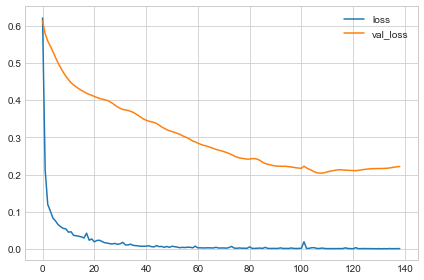

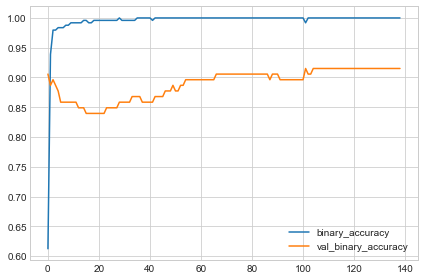

In [6]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=5000,
    callbacks=[early_stopping],
    verbose=0, 
)
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()